<a href="https://colab.research.google.com/github/shehabtarek12/python/blob/main/car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [89]:
df = pd.read_csv("/content/car.csv")
df

,Buying_Price,Maintenance_Price,Doors,Persons,Luggage_Boot,Safety,Acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


#Check for Data Types

In [90]:
pd.DataFrame({"Dtypes":df.dtypes,"Num_uniq":df.nunique()}).T

,Buying_Price,Maintenance_Price,Doors,Persons,Luggage_Boot,Safety,Acc
Dtypes,object,object,object,object,object,object,object
Num_uniq,4,4,4,3,3,3,4


In [91]:
df.Doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [92]:
df.Doors.replace('5more','5' , inplace =True)
df.Persons.replace('more','5' , inplace =True)
df.Doors = df.Doors.astype("int")
df.Persons = df.Persons.astype("int")

pd.DataFrame({"Dtypes":df.dtypes}).T


,Buying_Price,Maintenance_Price,Doors,Persons,Luggage_Boot,Safety,Acc
Dtypes,object,object,int64,int64,object,object,object


# Check for Null values

In [93]:
pd.DataFrame(df.isnull().sum()).T

,Buying_Price,Maintenance_Price,Doors,Persons,Luggage_Boot,Safety,Acc
0,0,0,0,0,0,0,0


# Check for variation

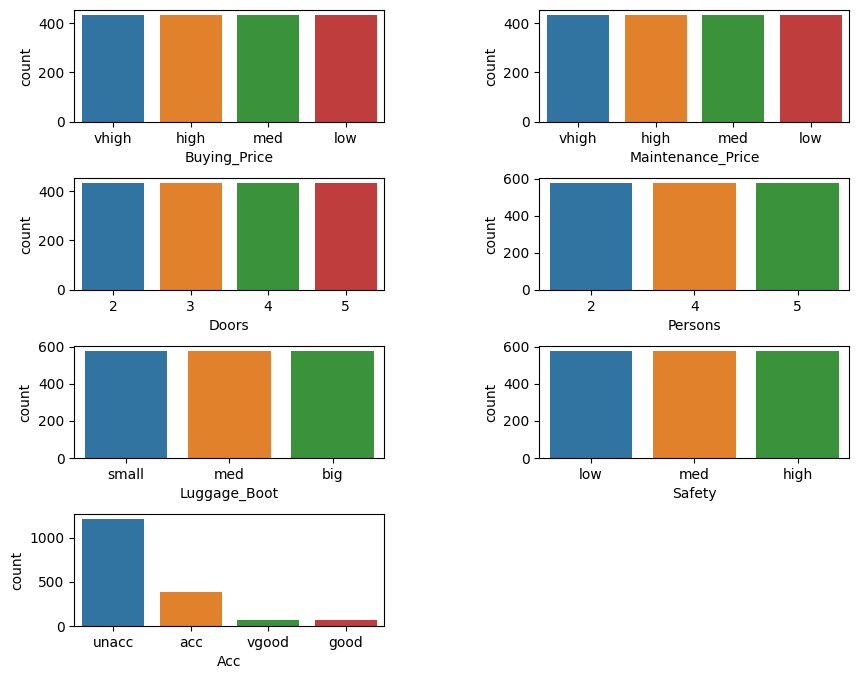

In [94]:
plt.figure(figsize=(10,8))
for i , col in enumerate(df.columns):
  plt.subplot(4, 2 , i+1)
  sns.countplot(x= col,data=df)

plt.subplots_adjust(hspace=.5 , wspace=.5)
plt.show()

# Visualization

Buying_Price & Acceptability


Buying_Price,high,low,med,vhigh
Acc,,,,
acc,108.0,89.0,115.0,72.0
good,0.0,46.0,23.0,0.0
unacc,324.0,258.0,268.0,360.0
vgood,0.0,39.0,26.0,0.0


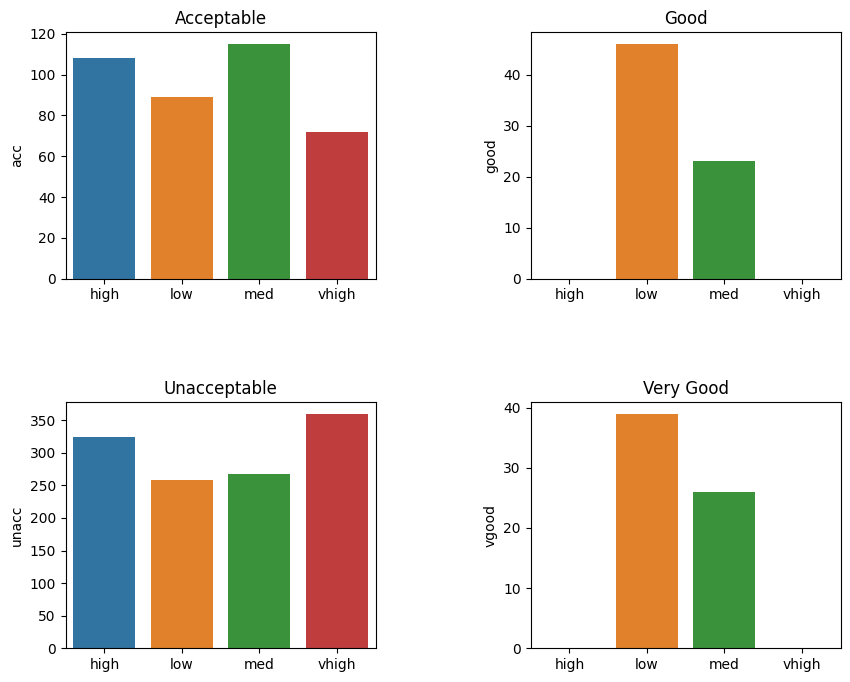

Maintenance_Price & Acceptability


Buying_Price,high,low,med,vhigh
Acc,,,,
acc,108.0,89.0,115.0,72.0
good,0.0,46.0,23.0,0.0
unacc,324.0,258.0,268.0,360.0
vgood,0.0,39.0,26.0,0.0


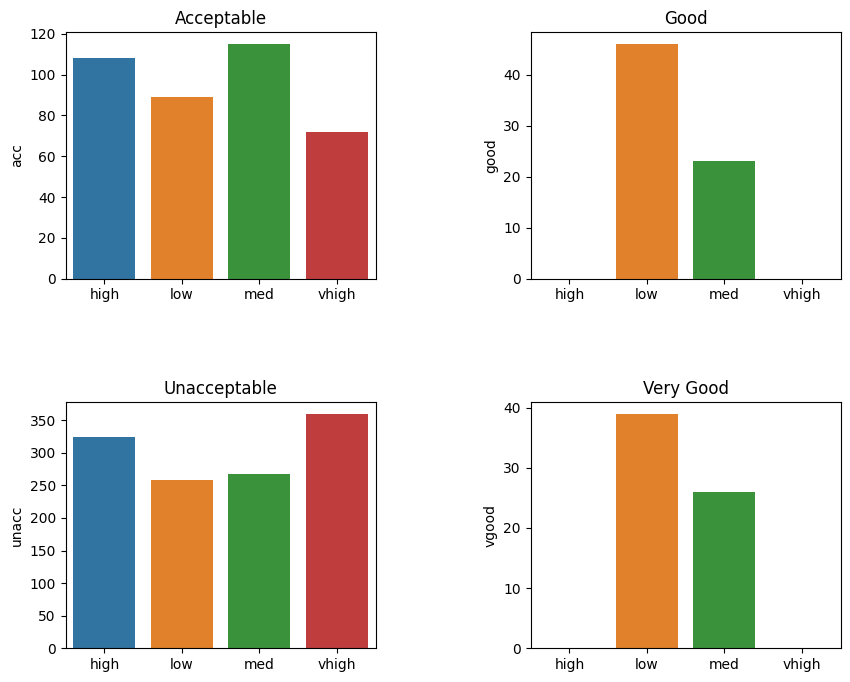

Doors & Acceptability


Buying_Price,high,low,med,vhigh
Acc,,,,
acc,108.0,89.0,115.0,72.0
good,0.0,46.0,23.0,0.0
unacc,324.0,258.0,268.0,360.0
vgood,0.0,39.0,26.0,0.0


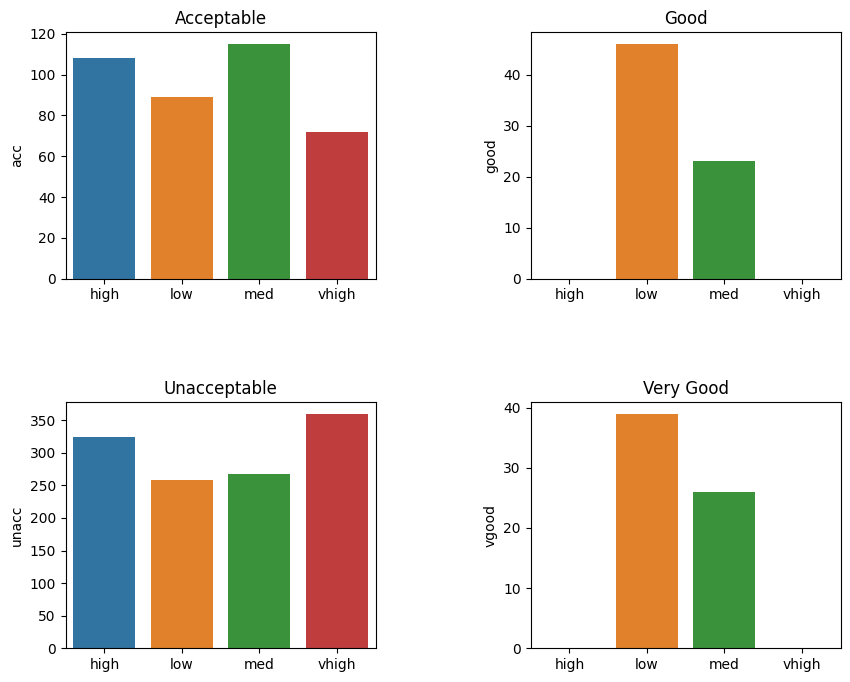

Persons & Acceptability


Buying_Price,high,low,med,vhigh
Acc,,,,
acc,108.0,89.0,115.0,72.0
good,0.0,46.0,23.0,0.0
unacc,324.0,258.0,268.0,360.0
vgood,0.0,39.0,26.0,0.0


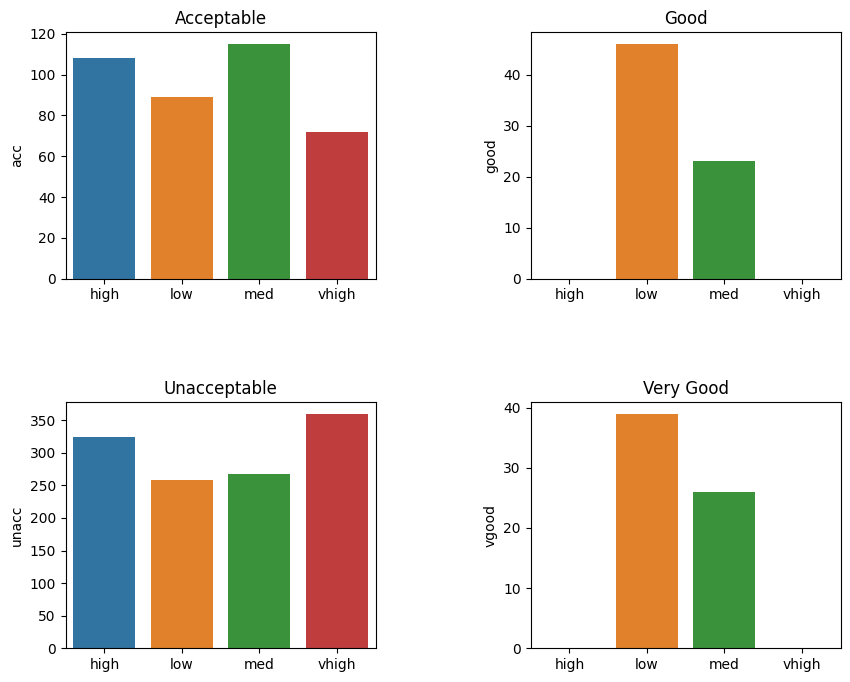

Luggage_Boot & Acceptability


Buying_Price,high,low,med,vhigh
Acc,,,,
acc,108.0,89.0,115.0,72.0
good,0.0,46.0,23.0,0.0
unacc,324.0,258.0,268.0,360.0
vgood,0.0,39.0,26.0,0.0


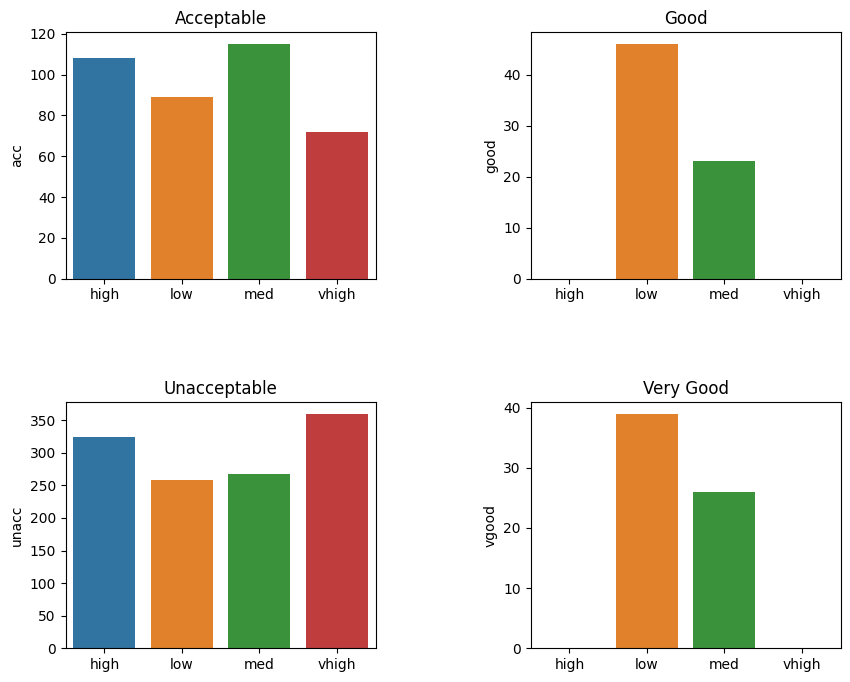

Safety & Acceptability


Buying_Price,high,low,med,vhigh
Acc,,,,
acc,108.0,89.0,115.0,72.0
good,0.0,46.0,23.0,0.0
unacc,324.0,258.0,268.0,360.0
vgood,0.0,39.0,26.0,0.0


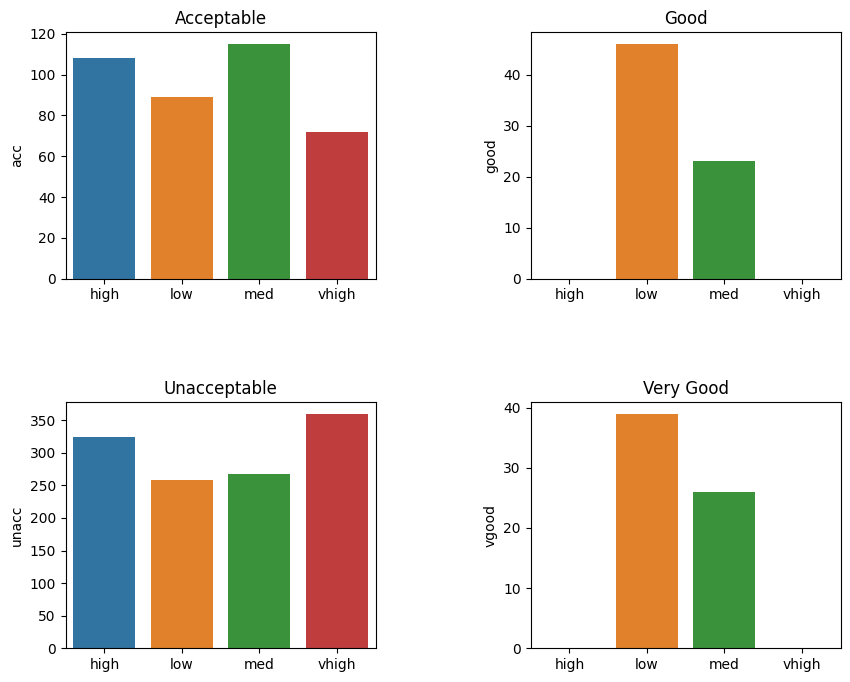

Acc & Acceptability


Buying_Price,high,low,med,vhigh
Acc,,,,
acc,108.0,89.0,115.0,72.0
good,0.0,46.0,23.0,0.0
unacc,324.0,258.0,268.0,360.0
vgood,0.0,39.0,26.0,0.0


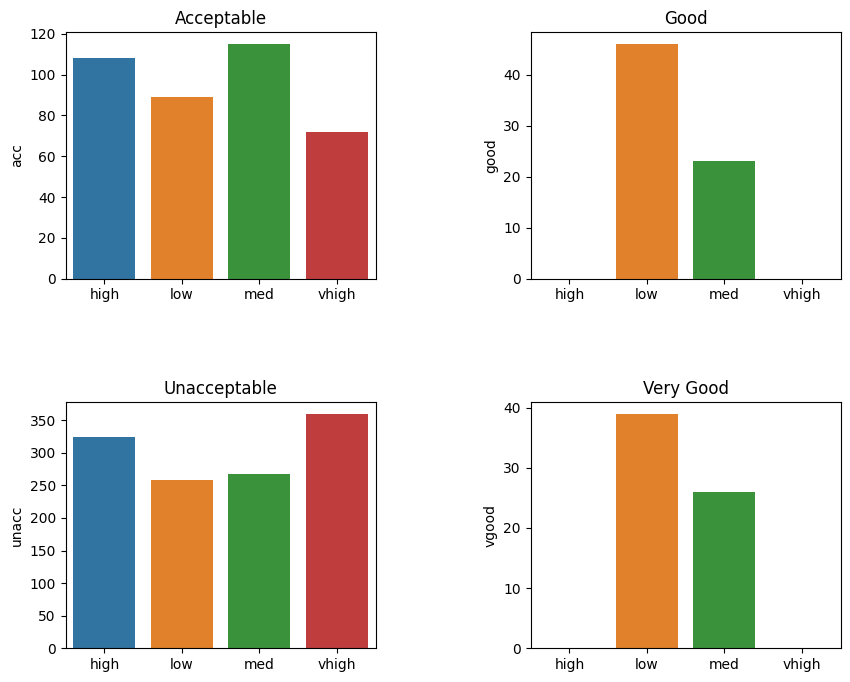

In [95]:
# df.pivot_table(index="Acc", columns="Buying_Price",aggfunc=np.mean)#34an a3ml mean aw3a t7wlha catigories
vals = "Doors"
alt = "Persons"

for col in df.columns:
    if col == vals:
        tmp = vals
        vals = alt
        alt = tmp

    print(f"{col} & Acceptability")

    agg = df.pivot_table(index="Acc", columns="Buying_Price", values=vals, aggfunc=len)
    agg.fillna(0, inplace=True)

    display(agg)

    acc, good, unacc, vgood = agg.iloc[0], agg.iloc[1], agg.iloc[2], agg.iloc[3]
    cats = agg.columns.tolist()

    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    sns.barplot(x=cats, y=acc)
    plt.title("Acceptable")

    plt.subplot(2, 2, 2)
    sns.barplot(x=cats, y=good)
    plt.title("Good")

    plt.subplot(2, 2, 3)
    sns.barplot(x=cats, y=unacc)
    plt.title("Unacceptable")

    plt.subplot(2, 2, 4)
    sns.barplot(x=cats, y=vgood)
    plt.title("Very Good")

    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

    print("=================================")


# Check for duplicates


In [96]:
df.duplicated().sum()

0

# Data split

In [97]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,test_size =.2 , random_state=42)#42 byl8bt el sfof , fa byl8bt el columns 34an y4of lama y8yr elhyper paramter a4of el donya 3amla eh
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train ,test_size = .2 , random_state=42)

# Encoding

In [98]:
# cols_to_encode = 'Buying_Price Maintenance_Price Lunggage_Boot Safet'.split()
# pd.get_dummies(df , columns = cols_to_encode , drop_first=True)
print(X_train.Buying_Price.unique())
X_train.Buying_Price=X_train.Buying_Price.map({'low':0,'med':1,'high':2 , 'vhigh':3})
X_val.Buying_Price=X_val.Buying_Price.map({'low':0,'med':1,'high':2 , 'vhigh':3})
X_test.Buying_Price=X_test.Buying_Price.map({'low':0,'med':1,'high':2 , 'vhigh':3})


['low' 'high' 'med' 'vhigh']


In [99]:
print(X_train.Maintenance_Price.unique())
X_train.Maintenance_Price=X_train.Maintenance_Price.map({'low':0,'med':1,'high':2 , 'vhigh':3})
X_val.Maintenance_Price=X_val.Maintenance_Price.map({'low':0,'med':1,'high':2 , 'vhigh':3})
X_test.Maintenance_Price=X_test.Maintenance_Price.map({'low':0,'med':1,'high':2 , 'vhigh':3})



['med' 'vhigh' 'low' 'high']


In [100]:
print(X_train.Luggage_Boot.unique())
X_train.Luggage_Boot=X_train.Luggage_Boot.map({'small':0,'med':1,'big':2 })
X_val.Luggage_Boot=X_val.Luggage_Boot.map({'small':0,'med':1,'big':2 })
X_test.Luggage_Boot=X_test.Luggage_Boot.map({'small':0,'med':1,'big':2 })

['med' 'big' 'small']


In [101]:
print(X_train.Safety.unique())
X_train.Safety=X_train.Safety.map({'low':0,'med':1,'high':2 })
X_val.Safety=X_val.Safety.map({'low':0,'med':1,'high':2 })
X_test.Safety=X_test.Safety.map({'low':0,'med':1,'high':2 })

['low' 'high' 'med']


In [102]:
print(Y_train.Acc.unique())
Y_train.Acc=Y_train.Acc.map({'unacc':0,'acc':1,'vgood':2 ,'good':3})
Y_val.Acc=Y_val.Acc.map({'unacc':0,'acc':1,'vgood':2 ,'good':3})
Y_test.Acc=Y_test.Acc.map({'unacc':0,'acc':1,'vgood':2 ,'good':3})

['unacc' 'acc' 'vgood' 'good']


#ML Model

In [103]:
from sklearn.metrics import accuracy_score
def evaluate(model,X,Y):
    pred = model.predict(X)
    acc = accuracy_score(Y,pred)
    return acc

##Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)

LogisticRegression()

 Evaluation

In [105]:
print(evaluate(lr_model,X_train,Y_train))
print(evaluate(lr_model,X_val,Y_val))

0.860633484162896
0.8303249097472925


# Descision Tree (best model)

In [122]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=12)
dt_model.fit(X_train , Y_train)


DecisionTreeClassifier(max_depth=12)

Evaluation

In [123]:
print(evaluate(dt_model,X_train,Y_train))
print(evaluate(dt_model,X_val,Y_val))

1.0
0.9747292418772563


#Final Test

In [125]:
print(evaluate(dt_model , X_test , Y_test))

0.9508670520231214


In [135]:
# from sklearn.svm import SVC #svc (classfcation),svr(regression)
# svm_model = SVC(kernel="poly",degree= 4)
# svm_model.fit(X_train , Y_train)

SVC(degree=4, kernel='poly')

In [136]:
# print(evaluate(svm_model,X_train,Y_train))
# print(evaluate(svm_model,X_val,Y_val))

0.96289592760181
0.9458483754512635
